In [1]:
import pandas as pd
import json
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

import warnings
warnings.simplefilter("ignore")

In [2]:
def json_to_dataframe(json_file_path):
    
    with open(json_file_path) as data_file:    
        temp = json.load(data_file)
    
    df = pd.DataFrame(temp['states_daily'])
    
    return df


def get_range_date(df, start_date, end_date):
    df['date_converted'] = pd.to_datetime(df['date'])
    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    df = df.loc[(df['date_converted'] >= start_date) & (df['date_converted'] <= end_date)]
    
    return df



def LR_helper(df, case):
    df.loc[:, 'dl'] = df["dl"].astype(int)
    
    df.loc[:, 'date_ordinal'] = np.arange(1, len(df)+1)
    

    fig = plt.figure(figsize=(16, 8), dpi=400)
    
    ax = sns.regplot(data=df, x='date_ordinal', y='dl')
    
    plt.title(case, fontsize=16)
    plt.xlabel('date', fontsize=16)
    plt.ylabel('delhi cases', fontsize=16)
    plt.xticks(df['date_ordinal'][::4], df['date'], rotation='45')
    plt.savefig(case)
    plt.show()

    
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(df['date_ordinal'], df['dl'])
    print("Using helper=> intercept: ", intercept, "\t slope: ", slope)
    
    return intercept, slope


def LR_scratch(df, case):
    X = np.arange(1, len(df)+1)
    Y = df['dl'].values
    Y = Y.astype(np.float)
    
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    
    numerator = 0
    denominator = 0
    
    for i in range(len(X)):
        numerator = numerator + ((X[i] - x_mean) * (Y[i] - y_mean))
        denominator = denominator + ((X[i] - x_mean) ** 2)

    slope = numerator / denominator
    intercept = y_mean - (slope * x_mean)
    
    print("from scratch=> intercept: ", intercept, "\t slope: ", slope)
    
    return intercept, slope


def Q3(json_file_path, start_date, end_date):
    """Q3 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    
    df = json_to_dataframe(json_file_path)
    df = get_range_date(df, start_date, end_date)
    
    df = df[['dl','status', 'date']]
    
    confirmed_data = df.loc[df['status'] == 'Confirmed']
    recovered_data = df.loc[df['status'] == 'Recovered']
    deceased_data = df.loc[df['status'] == 'Deceased']
    
    
    confirmed_intercept, confirmed_slope = LR_helper(confirmed_data, 'confirmed')
    confirmed_intercept_s, confirmed_slope_s = LR_scratch(confirmed_data, 'confirmed')
    
    recovered_intercept, recovered_slope = LR_helper(recovered_data, 'recovered')
    recovered_intercept_s, recovered_slope_s = LR_scratch(recovered_data, 'recovered')
    
    deceased_intercept, deceased_slope = LR_helper(deceased_data, 'deceased')
    deceased_intercept_s, deceased_slope_s = LR_scratch(deceased_data, 'deceased')
     
    return confirmed_intercept, confirmed_slope, recovered_intercept, recovered_slope, deceased_intercept, deceased_slope

MT19040


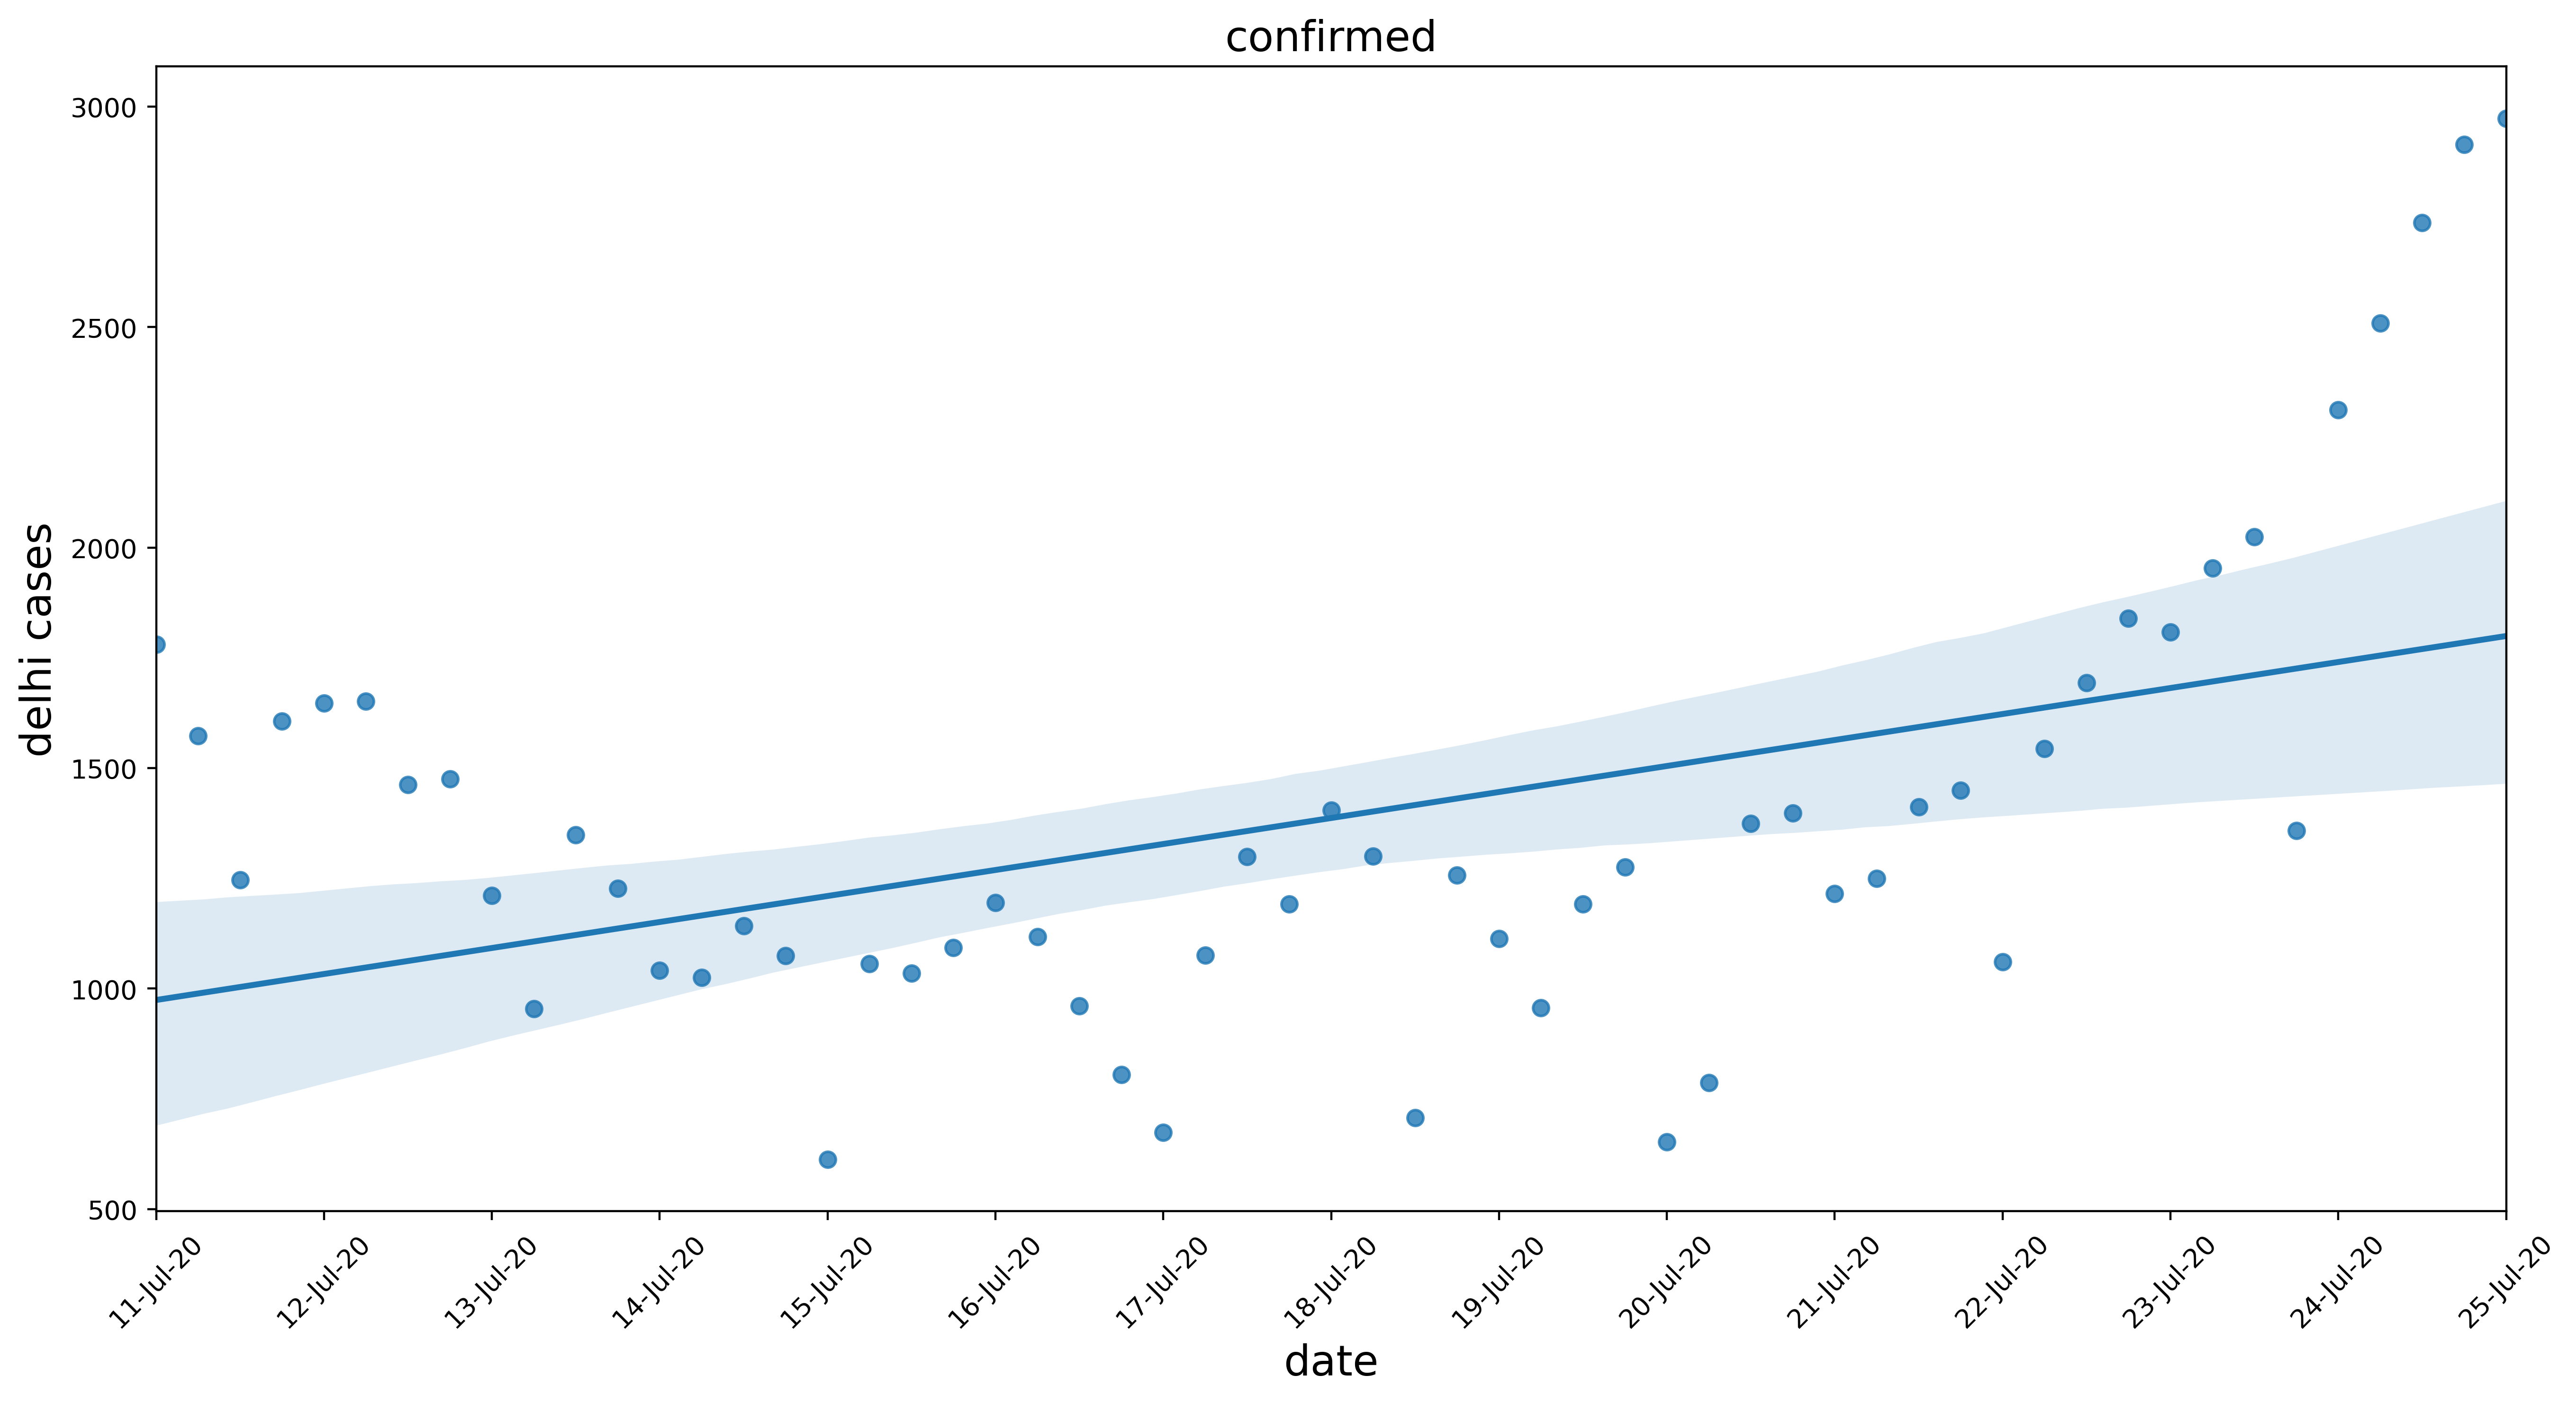

Using helper=> intercept:  959.4548872180451 	 slope:  14.739305159450351
from scratch=> intercept:  959.4548872180451 	 slope:  14.73930515945035


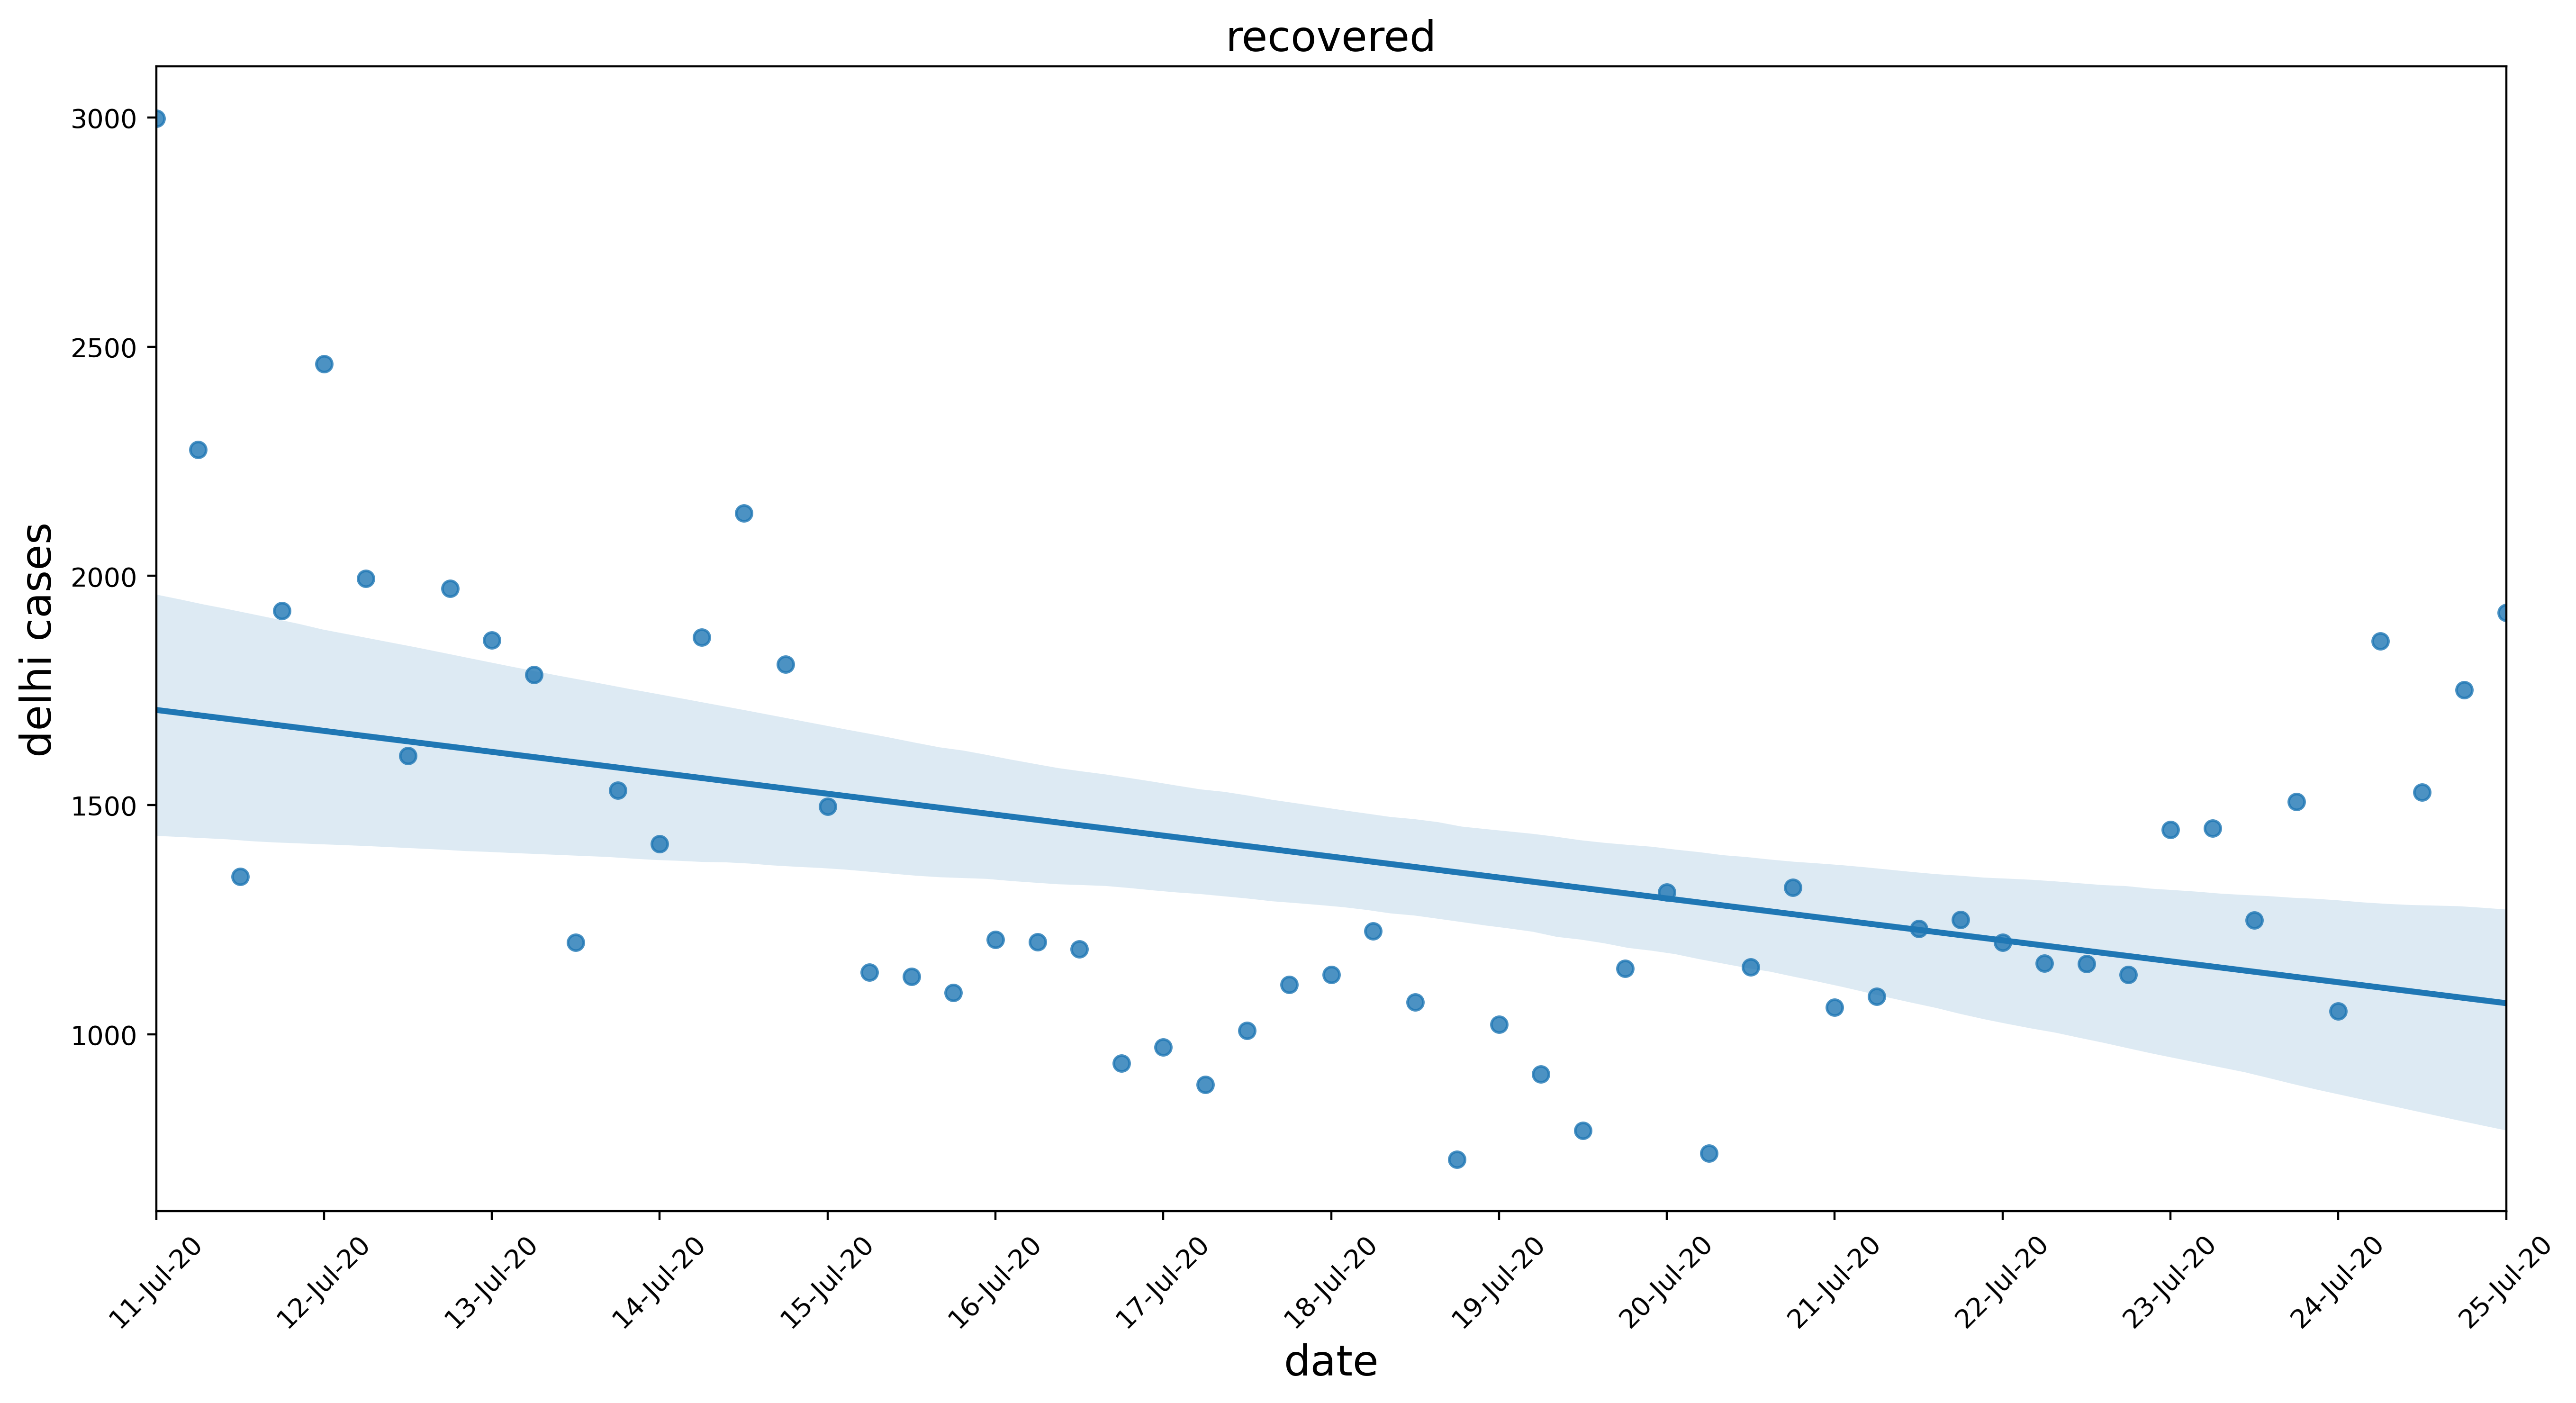

Using helper=> intercept:  1718.9298245614036 	 slope:  -11.426497277676951
from scratch=> intercept:  1718.9298245614036 	 slope:  -11.426497277676951


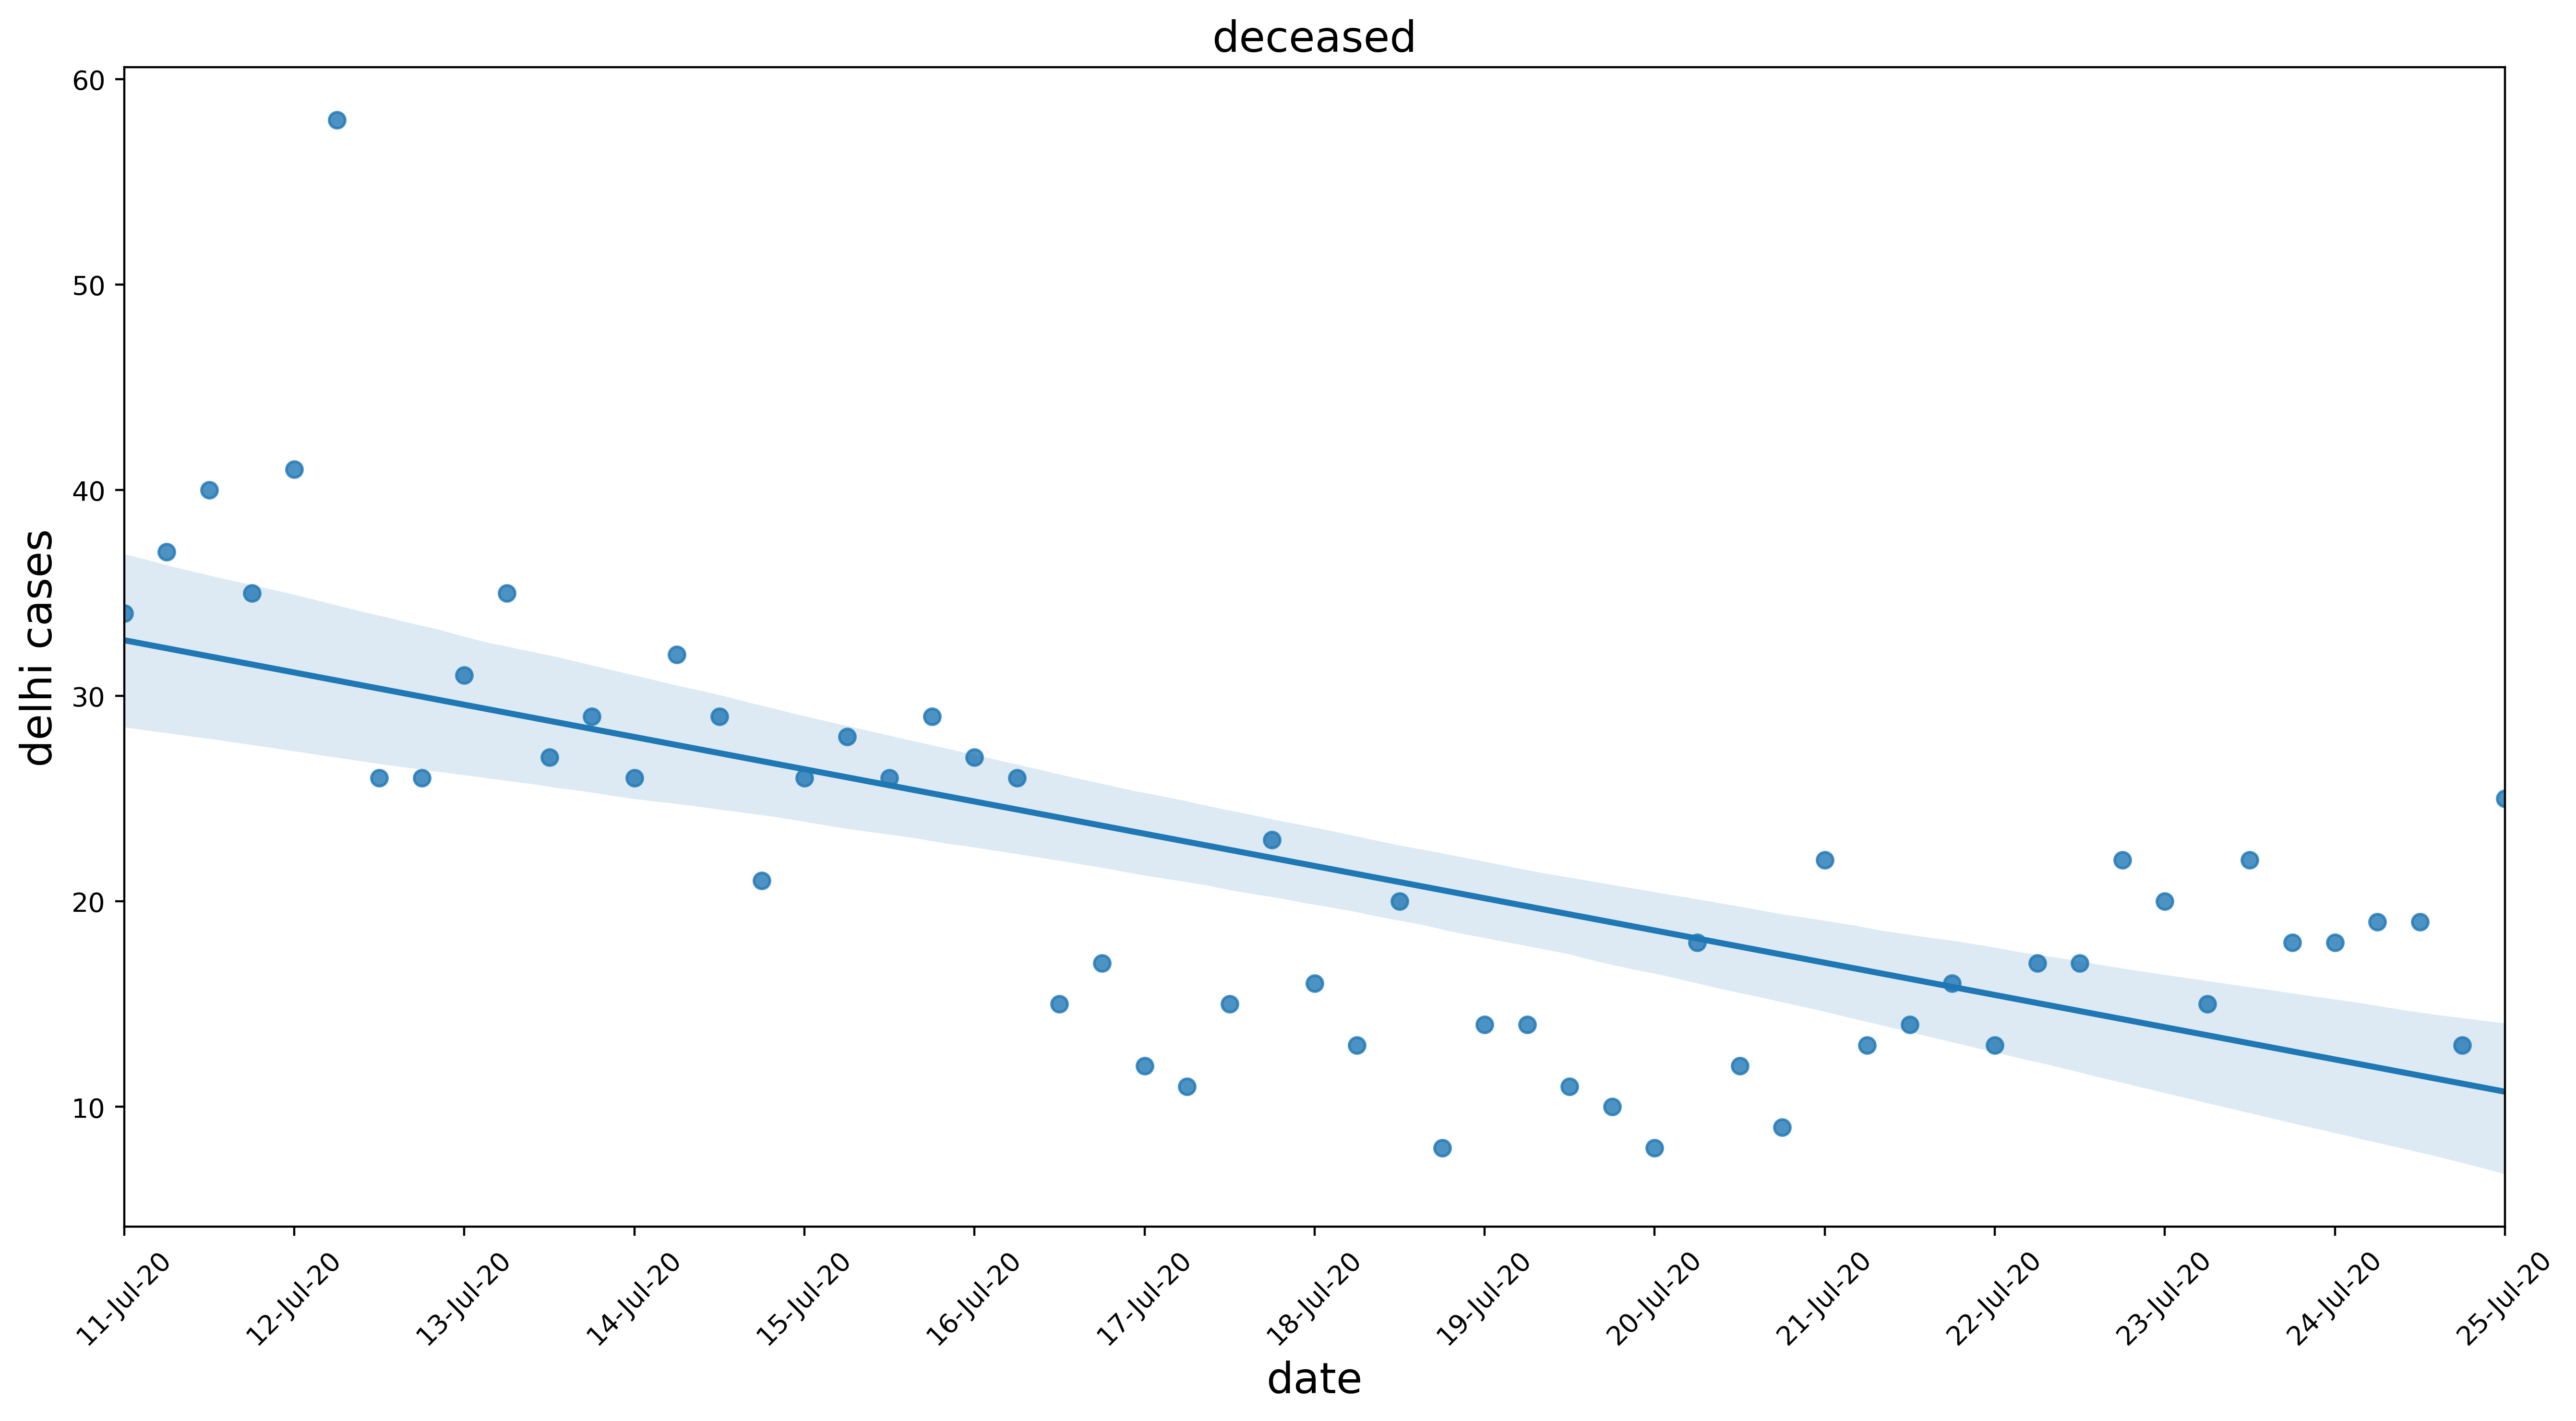

Using helper=> intercept:  33.09147869674186 	 slope:  -0.3921441534871664
from scratch=> intercept:  33.09147869674186 	 slope:  -0.39214415348716636


In [3]:
if __name__ == "__main__":
    # execute only if run as a script
    print('MT19040') # Please put this first

    start_date = "2020-07-11"
    end_date = "2020-09-05"
    
    Q3('states_daily.json', start_date, end_date)